# 07_1_LEARN-DataAnalysisML

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/07_1_LEARN_DataAnalysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [259]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [260]:
# cloning the data repo
!git clone https://github.com/hiyama341/ConStrain_on_google_colab.git

fatal: destination path 'ConStrain_on_google_colab' already exists and is not an empty directory.


## 1. Setting up the AutoML library

In [261]:
%%capture 
!pip install h2o

In [262]:
import h2o
from h2o.automl import H2OAutoML

In [263]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost", min_mem_size_GB=8)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,38 secs
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,4 months and 28 days !!!
H2O_cluster_name:,H2O_from_python_lucaslevassor_ubyh33
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.536 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [264]:
#h2o.shutdown()

### 1.1 Import out dataframe to h20 object

Train a model based on the target and the df

In [265]:
# Run ML with new input 
new_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_all_analytics.csv')
new_input_for_ml

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_C01,1,2,5,9,0.536658
2,yp49_D01,2,4,7,3,0.175896
3,yp49_E01,2,1,5,7,0.345201
4,yp49_F01,3,3,6,1,26.416324
...,...,...,...,...,...,...
162,yp51_C12,8,3,7,2,0.000000
163,yp51_D12,8,2,7,6,0.614962
164,yp51_E12,8,1,6,10,0.466688
165,yp50_F05,6,1,8,2,15.155009


In [266]:
new_input_for_ml['default_rank'] = new_input_for_ml['Amt_norm'].rank()
new_input_for_ml['max_rank'] = new_input_for_ml['Amt_norm'].rank(method='max')
new_input_for_ml['NA_bottom'] = new_input_for_ml['Amt_norm'].rank(na_option='bottom')
new_input_for_ml['pct_rank'] = new_input_for_ml['Amt_norm'].rank(pct=True)
new_input_for_ml = new_input_for_ml.sort_values(by= 'max_rank', ascending = False)

In [267]:
new_input_for_ml.head(50)

,Line_name,0,1,2,3,Amt_norm,default_rank,max_rank,NA_bottom,pct_rank
73,yp50_D03,5,2,6,3,277.307816,167.0,167.0,167.0,1.000000
75,yp50_G03,6,2,6,5,176.917201,166.0,166.0,166.0,0.994012
86,yp50_E05,5,1,6,8,163.352037,165.0,165.0,165.0,0.988024
106,yp50_A09,4,2,6,3,152.013305,164.0,164.0,164.0,0.982036
126,yp51_A02,7,2,6,1,141.151036,163.0,163.0,163.0,0.976048
97,yp50_D07,5,2,5,5,140.230004,162.0,162.0,162.0,0.970060
21,yp49_F04,3,2,6,2,138.940568,161.0,161.0,161.0,0.964072
123,yp51_A01,7,2,5,1,127.125752,160.0,160.0,160.0,0.958084
111,yp50_F10,6,2,5,4,113.702822,159.0,159.0,159.0,0.952096
85,yp50_D05,5,2,8,4,93.912536,158.0,158.0,158.0,0.946108


In [268]:
# Choosing which coloums to train on 
new_input_for_ml = new_input_for_ml[['Line_name','0','1','2','3','Amt_norm']]
new_input_for_ml.columns = ['Line_name','0','1','2','3','Amt_norm']

In [269]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:167
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.580838323353294,2.6826347305389233,6.562874251497007,5.305389221556882,17.189179575556167
maxs,NaN,8.0,4.0,8.0,10.0,277.3078163064027
sigma,NaN,2.253055064641254,1.1621014428030094,1.1696200092422182,2.8363232921290003,40.680610367197914
zeros,0,0,0,0,0,59
missing,0,0,0,0,0,0
0,yp50_D03,5.0,2.0,6.0,3.0,277.3078163064027
1,yp50_G03,6.0,2.0,6.0,5.0,176.91720093355448
2,yp50_E05,5.0,1.0,6.0,8.0,163.3520367899325


In [270]:
# Since the data is categorical we need to make it from numerical to categorical 

df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()


In [271]:
df_test.describe()

Rows:167
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,enum,enum,enum,enum,real
mins,NaN,,,,,0.0
mean,NaN,,,,,17.189179575556167
maxs,NaN,,,,,277.3078163064027
sigma,NaN,,,,,40.680610367197914
zeros,0,,,,,59
missing,0,0,0,0,0,0
0,yp50_D03,5,2,6,3,277.3078163064027
1,yp50_G03,6,2,6,5,176.91720093355448
2,yp50_E05,5,1,6,8,163.3520367899325


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


## 2. RUN automl

Here we are defining the autoML object and after we can train it

In [272]:
# Select the columns we want to train on
feature_cols = ['0', '1', '2', '3']

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
    max_models=None,  # None =  no limit
    nfolds=5,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    exclude_algos = ["StackedEnsemble"],
    sort_metric = "MAE",
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [273]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 ) 

AutoML progress: |
09:26:42.931: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 167.0.

███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 28.8 s, sys: 4.2 s, total: 33 s
Wall time: 1h 2s
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_2_20221207_92641_model_17


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 641 weights/biases, 10.8 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,10.0,,,,,,,,,
1,,2,20,RectifierDropout,50.0,0.0,0.0,0.14396,0.353457,0.0,-0.391741,1.659101,1.081658,3.460455
2,,3,1,Linear,,0.0,0.0,0.000911,0.000769,0.0,0.127878,0.949649,-0.392001,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 65.88513859284406
RMSE: 8.116966095336611
MAE: 4.347840452681539
RMSLE: 0.7438982204648629
Mean Residual Deviance: 65.88513859284406

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 442.7842509204798
RMSE: 21.042439281615614
MAE: 8.968044757088938
RMSLE: NaN
Mean Residual Deviance: 442.7842509204798

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,8.959867,2.458129,7.517321,11.768023,11.324781,8.003367,6.185845
1,mean_residual_deviance,441.040900,212.170850,467.753750,705.469800,566.276100,292.269870,173.434880
2,mse,441.040900,212.170850,467.753750,705.469800,566.276100,292.269870,173.434880
3,r2,0.718215,0.127616,0.838836,0.562001,0.604569,0.760131,0.825538
4,residual_deviance,441.040900,212.170850,467.753750,705.469800,566.276100,292.269870,173.434880
5,rmse,20.450045,5.342817,21.627615,26.560682,23.796556,17.095901,13.169468
6,rmsle,0.883580,0.072189,NaN,0.956360,NaN,0.882383,0.811997



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-07 09:43:14,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-07 09:43:14,8 min 20.204 sec,208750 obs/sec,10.0,1,1670.0,61.463033,3777.704477,58.786558,-1.296473
2,,2022-12-07 09:43:18,8 min 23.748 sec,470892 obs/sec,10010.0,1001,1671670.0,8.116966,65.885139,4.347840,0.959948



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.071525
1,2.7,0.979940,0.979940,0.070090
2,1.4,0.916865,0.916865,0.065579
3,3.6,0.870327,0.870327,0.062250
4,1.3,0.856868,0.856868,0.061288
5,0.8,0.830930,0.830930,0.059432
6,3.10,0.735619,0.735619,0.052615
7,2.8,0.735438,0.735438,0.052602
8,3.7,0.618598,0.618598,0.044245
9,0.2,0.594558,0.594558,0.042526



See the whole table with table.as_data_frame()


In [274]:
print('DOOOOOOONE')

DOOOOOOONE


## 3. Processing model


In [275]:
# saving the models
leaderboard = AutoML.leaderboard
lb= leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])


## get rid of models with stacked ensemble - they; the tree-based models, the tree ensemble (GBM or Random Forest) ends up memorizing the training data.
##The model has a poor time generalizing on validation data
#for model in model_ids:
#    if 'StackedEnsemble' in model:
#        model_ids.remove(model)

out_path = 'ConStrain_on_google_colab/Data/processed/ML_data_leaderboard2'

for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)


In [276]:
len(model_ids)

286

Now we want to extract the best models that are not StackedEnsemble

In [277]:

df_from_h2o_object = lb.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,mae,rmse,mse,rmsle,mean_residual_deviance
0,DeepLearning_grid_1_AutoML_2_20221207_92641_model_17,8.968045,21.042439,442.784251,NaN,442.784251
1,DeepLearning_grid_1_AutoML_2_20221207_92641_model_35,9.598489,22.562511,509.066924,NaN,509.066924
2,DeepLearning_grid_1_AutoML_2_20221207_92641_model_13,9.950615,21.287983,453.178241,NaN,453.178241
3,DeepLearning_grid_1_AutoML_2_20221207_92641_model_44,10.020870,23.007448,529.342651,NaN,529.342651
4,DeepLearning_grid_1_AutoML_2_20221207_92641_model_51,10.059181,21.683590,470.178068,NaN,470.178068
...,...,...,...,...,...,...
281,DeepLearning_grid_2_AutoML_2_20221207_92641_model_10,49.354577,56.692656,3214.057249,NaN,3214.057249
282,DeepLearning_grid_2_AutoML_2_20221207_92641_model_7,53.237958,66.892252,4474.573313,NaN,4474.573313
283,DeepLearning_grid_3_AutoML_2_20221207_92641_model_8,64.920031,87.029662,7574.162061,NaN,7574.162061
284,DeepLearning_grid_2_AutoML_2_20221207_92641_model_8,66.621978,80.846438,6536.146570,NaN,6536.146570


In [278]:
index_to_delete = []
for index, row in df_from_h2o_object.iterrows():
    if 'StackedEnsemble' in row['model_id']:
        index_to_delete.append(index)

data_wo_ensemble = df_from_h2o_object.drop(labels=index_to_delete, axis=0)
final_df = h2o.H2OFrame(data_wo_ensemble)
final_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_2_20221207_92641_model_17,8.96804,21.0424,442.784,nan,442.784
DeepLearning_grid_1_AutoML_2_20221207_92641_model_35,9.59849,22.5625,509.067,nan,509.067
DeepLearning_grid_1_AutoML_2_20221207_92641_model_13,9.95061,21.288,453.178,nan,453.178
DeepLearning_grid_1_AutoML_2_20221207_92641_model_44,10.0209,23.0074,529.343,nan,529.343
DeepLearning_grid_1_AutoML_2_20221207_92641_model_51,10.0592,21.6836,470.178,nan,470.178
DeepLearning_grid_1_AutoML_2_20221207_92641_model_68,10.08,21.9007,479.641,nan,479.641
DeepLearning_grid_1_AutoML_2_20221207_92641_model_58,10.1781,21.8683,478.225,nan,478.225
DeepLearning_grid_1_AutoML_2_20221207_92641_model_59,10.1873,22.6503,513.035,nan,513.035
DeepLearning_grid_1_AutoML_2_20221207_92641_model_54,10.3027,23.8991,571.169,nan,571.169
DeepLearning_grid_1_AutoML_2_20221207_92641_model_74,10.3268,21.8087,475.618,nan,475.618


### 3.1 Saving the best model

In [279]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_2_20221207_92641_model_17


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 641 weights/biases, 10.8 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,10.0,,,,,,,,,
1,,2,20,RectifierDropout,50.0,0.0,0.0,0.14396,0.353457,0.0,-0.391741,1.659101,1.081658,3.460455
2,,3,1,Linear,,0.0,0.0,0.000911,0.000769,0.0,0.127878,0.949649,-0.392001,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 65.88513859284406
RMSE: 8.116966095336611
MAE: 4.347840452681539
RMSLE: 0.7438982204648629
Mean Residual Deviance: 65.88513859284406

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 442.7842509204798
RMSE: 21.042439281615614
MAE: 8.968044757088938
RMSLE: NaN
Mean Residual Deviance: 442.7842509204798

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,8.959867,2.458129,7.517321,11.768023,11.324781,8.003367,6.185845
1,mean_residual_deviance,441.040900,212.170850,467.753750,705.469800,566.276100,292.269870,173.434880
2,mse,441.040900,212.170850,467.753750,705.469800,566.276100,292.269870,173.434880
3,r2,0.718215,0.127616,0.838836,0.562001,0.604569,0.760131,0.825538
4,residual_deviance,441.040900,212.170850,467.753750,705.469800,566.276100,292.269870,173.434880
5,rmse,20.450045,5.342817,21.627615,26.560682,23.796556,17.095901,13.169468
6,rmsle,0.883580,0.072189,NaN,0.956360,NaN,0.882383,0.811997



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-07 09:43:14,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-07 09:43:14,8 min 20.204 sec,208750 obs/sec,10.0,1,1670.0,61.463033,3777.704477,58.786558,-1.296473
2,,2022-12-07 09:43:18,8 min 23.748 sec,470892 obs/sec,10010.0,1001,1671670.0,8.116966,65.885139,4.347840,0.959948



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.071525
1,2.7,0.979940,0.979940,0.070090
2,1.4,0.916865,0.916865,0.065579
3,3.6,0.870327,0.870327,0.062250
4,1.3,0.856868,0.856868,0.061288
5,0.8,0.830930,0.830930,0.059432
6,3.10,0.735619,0.735619,0.052615
7,2.8,0.735438,0.735438,0.052602
8,3.7,0.618598,0.618598,0.044245
9,0.2,0.594558,0.594558,0.042526



See the whole table with table.as_data_frame()


In [280]:
model_path = h2o.save_model(model=best_model, path="ConStrain_on_google_colab/Data/processed/ML_models", force=True)

In [281]:
## exporting the second best model

#AutoML.get_best_model
#model_path = h2o.save_model(model='', path="ConStrain_on_google_colab/Data/processed/ML_models", force=True)

### 3.2 Exporting the leaderboard

In [282]:
# saving the leaderboard
import os
h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### 3.3 Importing the leaderboard

In [283]:
models_path = "ConStrain_on_google_colab/Data/processed/ML_data_leaderboard2/"

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_2_20221207_92641_model_17,8.96804,21.0424,442.784,nan,442.784
DeepLearning_grid_1_AutoML_2_20221207_92641_model_35,9.59849,22.5625,509.067,nan,509.067
DeepLearning_grid_1_AutoML_2_20221207_92641_model_13,9.95061,21.288,453.178,nan,453.178
DeepLearning_grid_1_AutoML_2_20221207_92641_model_44,10.0209,23.0074,529.343,nan,529.343
DeepLearning_grid_1_AutoML_2_20221207_92641_model_51,10.0592,21.6836,470.178,nan,470.178
DeepLearning_grid_1_AutoML_2_20221207_92641_model_68,10.08,21.9007,479.641,nan,479.641
DeepLearning_grid_1_AutoML_2_20221207_92641_model_58,10.1781,21.8683,478.225,nan,478.225
DeepLearning_grid_1_AutoML_2_20221207_92641_model_59,10.1873,22.6503,513.035,nan,513.035
DeepLearning_grid_1_AutoML_2_20221207_92641_model_54,10.3027,23.8991,571.169,nan,571.169
DeepLearning_grid_1_AutoML_2_20221207_92641_model_74,10.3268,21.8087,475.618,nan,475.618


In [284]:
lb.sort('mae')

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_2_20221207_92641_model_17,8.96804,21.0424,442.784,nan,442.784
DeepLearning_grid_1_AutoML_2_20221207_92641_model_35,9.59849,22.5625,509.067,nan,509.067
DeepLearning_grid_1_AutoML_2_20221207_92641_model_13,9.95061,21.288,453.178,nan,453.178
DeepLearning_grid_1_AutoML_2_20221207_92641_model_44,10.0209,23.0074,529.343,nan,529.343
DeepLearning_grid_1_AutoML_2_20221207_92641_model_51,10.0592,21.6836,470.178,nan,470.178
DeepLearning_grid_1_AutoML_2_20221207_92641_model_68,10.08,21.9007,479.641,nan,479.641
DeepLearning_grid_1_AutoML_2_20221207_92641_model_58,10.1781,21.8683,478.225,nan,478.225
DeepLearning_grid_1_AutoML_2_20221207_92641_model_59,10.1873,22.6503,513.035,nan,513.035
DeepLearning_grid_1_AutoML_2_20221207_92641_model_54,10.3027,23.8991,571.169,nan,571.169
DeepLearning_grid_1_AutoML_2_20221207_92641_model_74,10.3268,21.8087,475.618,nan,475.618


In [89]:
# saving best MAE model 
best_MAE_model = AutoML.get_best_model(algorithm="DeepLearning", criterion="mae")
best_MAE_model
#model_path = h2o.save_model(model=best_MAE_model, path="ConStrain_on_google_colab/Data/processed/ML_models", force=True)

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_2_AutoML_77_20221205_91250_model_46


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 4,151 weights/biases, 53.5 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0.0,,,,,,,,,
1,,2,50,RectifierDropout,40.0,0.0,0.0,0.141143,0.336597,0.0,-0.014768,0.281301,0.771485,0.867894
2,,3,50,RectifierDropout,40.0,0.0,0.0,0.002824,0.00579,0.0,-0.059735,0.186845,1.179824,0.449551
3,,4,1,Linear,,0.0,0.0,0.000248,0.000353,0.0,0.185117,0.22268,-0.47702,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 63.65873632750809
RMSE: 7.9786425115747655
MAE: 4.55897558806435
RMSLE: 0.6627483181448882
Mean Residual Deviance: 63.65873632750809

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 297.40833826015285
RMSE: 17.245530964866024
MAE: 8.431076297231074
RMSLE: NaN
Mean Residual Deviance: 297.40833826015285

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,8.412042,2.348481,10.443850,9.558955,10.041916,7.103193,4.912296
1,mean_residual_deviance,296.591370,122.246700,442.251430,287.364620,391.922270,216.274230,145.144320
2,mse,296.591370,122.246700,442.251430,287.364620,391.922270,216.274230,145.144320
3,r2,0.814406,0.051349,0.847623,0.821586,0.726321,0.822502,0.853996
4,residual_deviance,296.591370,122.246700,442.251430,287.364620,391.922270,216.274230,145.144320
5,rmse,16.906496,3.667720,21.029776,16.951832,19.797026,14.706265,12.047586
6,rmsle,0.868986,0.178233,NaN,NaN,1.052697,0.857471,0.696790



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-05 09:48:43,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-05 09:48:43,19 min 17.286 sec,151818 obs/sec,10.0,1,1670.0,40.708442,1657.177243,19.272503,-0.007401
2,,2022-12-05 09:48:48,19 min 22.292 sec,277445 obs/sec,8330.0,833,1391110.0,7.219514,52.121381,3.995565,0.968315
3,,2022-12-05 09:48:48,19 min 23.142 sec,285170 obs/sec,10010.0,1001,1671670.0,7.978643,63.658736,4.558976,0.961302



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.070129
1,1.3,0.882182,0.882182,0.061867
2,0.8,0.856197,0.856197,0.060044
3,2.7,0.817421,0.817421,0.057325
4,3.6,0.805668,0.805668,0.056501
5,1.2,0.674642,0.674642,0.047312
6,0.5,0.646998,0.646998,0.045373
7,1.4,0.642098,0.642098,0.045030
8,2.6,0.627881,0.627881,0.044033
9,3.7,0.621572,0.621572,0.043590



See the whole table with table.as_data_frame()


## 4. Importing the best model

In [90]:
# old best model DeepLearning_grid_2_AutoML_1_20220727_100352_model_37

best_model = h2o.load_model("ConStrain_on_google_colab/Data/processed/ML_models/"+lb[0,0]) #DeepLearning_grid_2_AutoML_1_20220919_101302_model_8 #DeepLearning_grid_3_AutoML_1_20221114_143126_model_10
my_local_model = h2o.download_model(best_model, path="ConStrain_on_google_colab/Data/processed/ML_models/")
uploaded_model = h2o.upload_model(my_local_model)


In [91]:
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_2_AutoML_77_20221205_91250_model_46


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 4,151 weights/biases, 53.5 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0.0,,,,,,,,,
1,,2,50,RectifierDropout,40.0,0.0,0.0,0.141143,0.336597,0.0,-0.014768,0.281301,0.771485,0.867894
2,,3,50,RectifierDropout,40.0,0.0,0.0,0.002824,0.00579,0.0,-0.059735,0.186845,1.179824,0.449551
3,,4,1,Linear,,0.0,0.0,0.000248,0.000353,0.0,0.185117,0.22268,-0.47702,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 63.65873632750809
RMSE: 7.9786425115747655
MAE: 4.55897558806435
RMSLE: 0.6627483181448882
Mean Residual Deviance: 63.65873632750809

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 297.40833826015285
RMSE: 17.245530964866024
MAE: 8.431076297231074
RMSLE: NaN
Mean Residual Deviance: 297.40833826015285

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,8.412042,2.348481,10.443850,9.558955,10.041916,7.103193,4.912296
1,mean_residual_deviance,296.591370,122.246700,442.251430,287.364620,391.922270,216.274230,145.144320
2,mse,296.591370,122.246700,442.251430,287.364620,391.922270,216.274230,145.144320
3,r2,0.814406,0.051349,0.847623,0.821586,0.726321,0.822502,0.853996
4,residual_deviance,296.591370,122.246700,442.251430,287.364620,391.922270,216.274230,145.144320
5,rmse,16.906496,3.667720,21.029776,16.951832,19.797026,14.706265,12.047586
6,rmsle,0.868986,0.178233,NaN,NaN,1.052697,0.857471,0.696790



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-05 09:48:43,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-05 09:48:43,19 min 17.286 sec,151818 obs/sec,10.0,1,1670.0,40.708442,1657.177243,19.272503,-0.007401
2,,2022-12-05 09:48:48,19 min 22.292 sec,277445 obs/sec,8330.0,833,1391110.0,7.219514,52.121381,3.995565,0.968315
3,,2022-12-05 09:48:48,19 min 23.142 sec,285170 obs/sec,10010.0,1001,1671670.0,7.978643,63.658736,4.558976,0.961302



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.070129
1,1.3,0.882182,0.882182,0.061867
2,0.8,0.856197,0.856197,0.060044
3,2.7,0.817421,0.817421,0.057325
4,3.6,0.805668,0.805668,0.056501
5,1.2,0.674642,0.674642,0.047312
6,0.5,0.646998,0.646998,0.045373
7,1.4,0.642098,0.642098,0.045030
8,2.6,0.627881,0.627881,0.044033
9,3.7,0.621572,0.621572,0.043590



See the whole table with table.as_data_frame()


### 4.1 Investigate modelbest_model

Get the cross validation predictions

In [92]:
cross_validation_holdout_predictions = best_model.predict(df_test)


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [93]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
print(cross_validation_holdout_predictions)
print(len(cross_validation_holdout_predictions))

predict
210.102
139.432
131.448
110.623
143.916
217.078
95.6761
98.7626
116.793
33.1149



167


In [94]:
cross_validation_holdout_predictions.frame_id

'cv_holdout_prediction_DeepLearning_grid_2_AutoML_77_20221205_91250_model_46'

In [95]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram

,predict
0,210.101501
1,139.431606
2,131.448492
3,110.623153
4,143.916447
...,...
162,1.573752
163,1.810549
164,0.980256
165,-0.428458


In [96]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

5


In [97]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [98]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True).sort_values(by= 'Amt_norm', ascending = False).reset_index()
df3.head(50)

,index,Line_name,0,1,2,3,Amt_norm,predict
0,0,yp50_D03,5,2,6,3,277.307816,210.101501
1,1,yp50_G03,6,2,6,5,176.917201,139.431606
2,2,yp50_E05,5,1,6,8,163.352037,131.448492
3,3,yp50_A09,4,2,6,3,152.013305,110.623153
4,4,yp51_A02,7,2,6,1,141.151036,143.916447
5,5,yp50_D07,5,2,5,5,140.230004,217.078292
6,6,yp49_F04,3,2,6,2,138.940568,95.676095
7,7,yp51_A01,7,2,5,1,127.125752,98.762619
8,8,yp50_F10,6,2,5,4,113.702822,116.793380
9,9,yp50_D05,5,2,8,4,93.912536,33.114884


In [ ]:
# ranking the production

In [237]:
df3['default_rank'] = df3['Amt_norm'].rank()
df3['default_rank_predicted'] = df3['predict'].rank()


In [240]:
df3

,index,Line_name,0,1,2,3,Amt_norm,predict,norm_strict_measured_rank,Predicted_strict_production_rank_pct,norm_strict_measured_rank_pct,default_rank,default_rank_predicted
0,0,yp50_D03,5,2,6,3,277.307816,210.101501,1.000000,0.994012,1.000000,167.0,166.0
1,1,yp50_G03,6,2,6,5,176.917201,139.431606,0.994012,0.982036,0.994012,166.0,164.0
2,2,yp50_E05,5,1,6,8,163.352037,131.448492,0.988024,0.964072,0.988024,165.0,161.0
3,3,yp50_A09,4,2,6,3,152.013305,110.623153,0.982036,0.946108,0.982036,164.0,158.0
4,4,yp51_A02,7,2,6,1,141.151036,143.916447,0.976048,0.988024,0.976048,163.0,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,131,yp50_F12,6,4,7,4,0.000000,-0.256216,0.179641,0.077844,0.179641,30.0,13.0
163,132,yp51_E02,8,1,8,7,0.000000,1.143208,0.179641,0.359281,0.179641,30.0,60.0
164,133,yp50_G06,6,4,6,6,0.000000,3.274366,0.179641,0.520958,0.179641,30.0,87.0
165,134,yp50_E03,5,4,7,7,0.000000,0.980256,0.179641,0.284431,0.179641,30.0,47.5


/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_9976/2393049050.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['category'] = 'Predicted'
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_9976/2393049050.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['category'] = 'Strictosidine'
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to sub

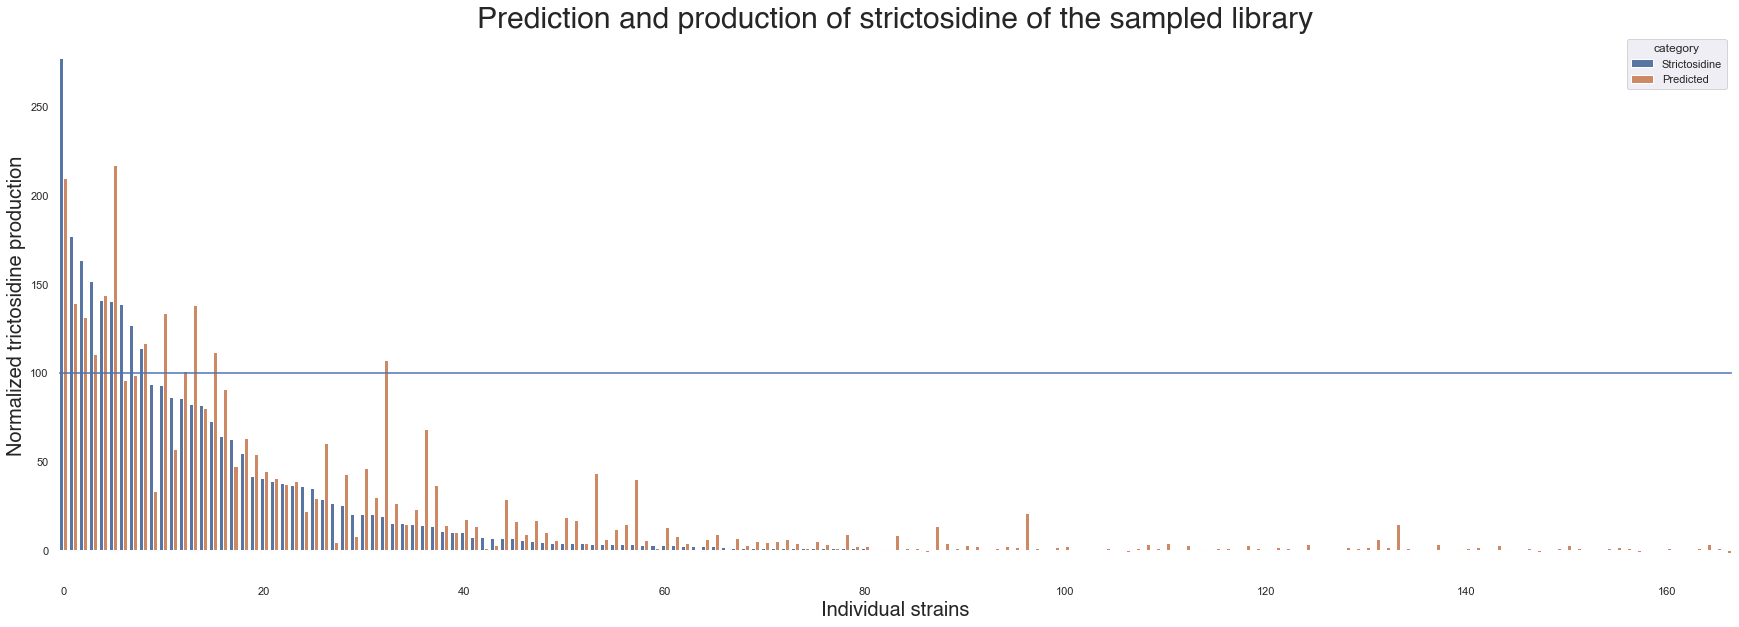

In [325]:
sns.set(rc = {'figure.figsize':(30,10) })

# initialize
ds1 = df3[['Line_name', 'Amt_norm']]
ds1.columns = ['Line_name', 'strict']

ds2 = df3[['Line_name', 'predict']]
ds2.columns = ['Line_name', 'strict']


ds2['category'] = 'Predicted'
ds1['category'] = 'Strictosidine'
dss = pd.concat([ds1, ds2])

ax = sns.barplot(x='Line_name', y='strict', hue='category', data=dss)

ax = plt.gca()
ax.set_xlabel('Individual strains', size = 20, fontname='Helvetica')
ax.set_ylabel('Normalized trictosidine production', size = 20, fontname='Helvetica')
ax.set_title('Prediction and production of strictosidine of the sampled library', size = 30, fontname='Helvetica')

# white background
ax.set_facecolor("white")

#plt.xticks([])
plt.xscale('linear') 

# normalized line
ax.axhline(100)


#ax.add_line
name = 'Prediction of the sampled library_ranked'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.pdf',format = 'pdf',  dpi = 120)



None

In [287]:
df3['norm_strict_measured_rank_pct']= df3['Amt_norm'].rank(pct=True)
df3['Predicted_strict_production_rank_pct'] = df3['predict'].rank(pct=True)
df3.to_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_w_predictions_and_ranking.csv')
df3

,index,Line_name,0,1,2,3,Amt_norm,predict,norm_strict_measured_rank,Predicted_strict_production_rank_pct,norm_strict_measured_rank_pct,default_rank,default_rank_predicted
0,0,yp50_D03,5,2,6,3,277.307816,210.101501,1.000000,0.994012,1.000000,167.0,166.0
1,1,yp50_G03,6,2,6,5,176.917201,139.431606,0.994012,0.982036,0.994012,166.0,164.0
2,2,yp50_E05,5,1,6,8,163.352037,131.448492,0.988024,0.964072,0.988024,165.0,161.0
3,3,yp50_A09,4,2,6,3,152.013305,110.623153,0.982036,0.946108,0.982036,164.0,158.0
4,4,yp51_A02,7,2,6,1,141.151036,143.916447,0.976048,0.988024,0.976048,163.0,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,131,yp50_F12,6,4,7,4,0.000000,-0.256216,0.179641,0.077844,0.179641,30.0,13.0
163,132,yp51_E02,8,1,8,7,0.000000,1.143208,0.179641,0.359281,0.179641,30.0,60.0
164,133,yp50_G06,6,4,6,6,0.000000,3.274366,0.179641,0.520958,0.179641,30.0,87.0
165,134,yp50_E03,5,4,7,7,0.000000,0.980256,0.179641,0.284431,0.179641,30.0,47.5


In [291]:
df3['color'] = "black" 

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


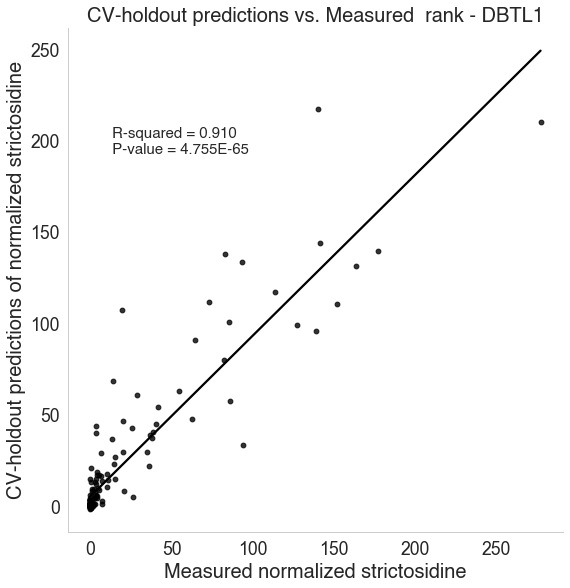

In [323]:
import seaborn as sns
from scipy.stats import pearsonr
import scipy as sp
from scipy import stats

#set seaborn plotting aesthetics as default
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 1.5})

g = sns.lmplot(data=df3, x="Amt_norm", y="predict" ,hue = 'color', palette=['#000000'], fit_reg = True, height=10, line_kws={'color': 'black'}, ci=False, legend=False)
r, p = stats.pearsonr(df3['Amt_norm'], df3['predict'])


ax = plt.gca()
# Add labels and titel
ax.set_title(f"CV-holdout predictions vs. Measured  rank - DBTL1", size = 20, fontname='Helvetica')
ax.set_ylabel('CV-holdout predictions of normalized strictosidine', size = 20, fontname='Helvetica')
ax.set_xlabel('Measured normalized strictosidine', size = 20, fontname='Helvetica')
ax.set_facecolor("white")
plt.suptitle(f"R-squared = {r:.3f} \n  P-value = {p:.3E}", y=0.8 , x= 0.3, size = 15, fontname='Helvetica', fontweight='bold')
# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(8, 8)
name = 'ML1_predicted_vs_amtnorm_corr'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.pdf',format = 'pdf',  dpi = 300)


None

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


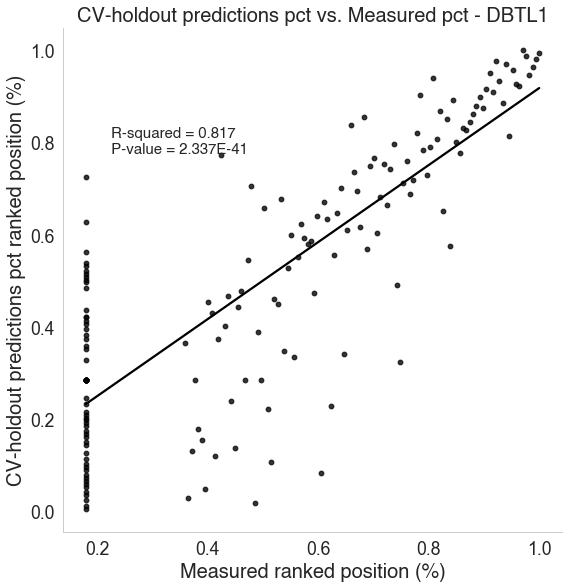

In [324]:
#set seaborn plotting aesthetics as default
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 1.5})

g = sns.lmplot(data=df3, x="norm_strict_measured_rank_pct", y="Predicted_strict_production_rank_pct" ,hue = 'color', palette=['#000000'], fit_reg = True, height=10, line_kws={'color': 'black'}, ci=False, legend=False)
r, p = stats.pearsonr(df3['norm_strict_measured_rank_pct'], df3['Predicted_strict_production_rank_pct'])


ax = plt.gca()
# Add labels and titel
ax.set_title(f"CV-holdout predictions pct vs. Measured pct - DBTL1", size = 20, fontname='Helvetica')
ax.set_ylabel('CV-holdout predictions pct ranked position (%)', size = 20, fontname='Helvetica')
ax.set_xlabel('Measured ranked position (%)', size = 20, fontname='Helvetica')
ax.set_facecolor("white")
plt.suptitle(f"R-squared = {r:.3f} \n  P-value = {p:.3E}", y=0.8 , x= 0.3, size = 15, fontname='Helvetica', fontweight='bold')
# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(8, 8)
name = 'ML1_predicted_vs_amtnorm_corr_ranked_pct'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.pdf',format = 'pdf',  dpi = 300)


None

### 4.2 Learning curve

In [295]:
uploaded_model.model_performance()


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 63.65873632750809
RMSE: 7.9786425115747655
MAE: 4.55897558806435
RMSLE: 0.6627483181448882
Mean Residual Deviance: 63.65873632750809


In [296]:
#uploaded_model.learning_curve_plot().


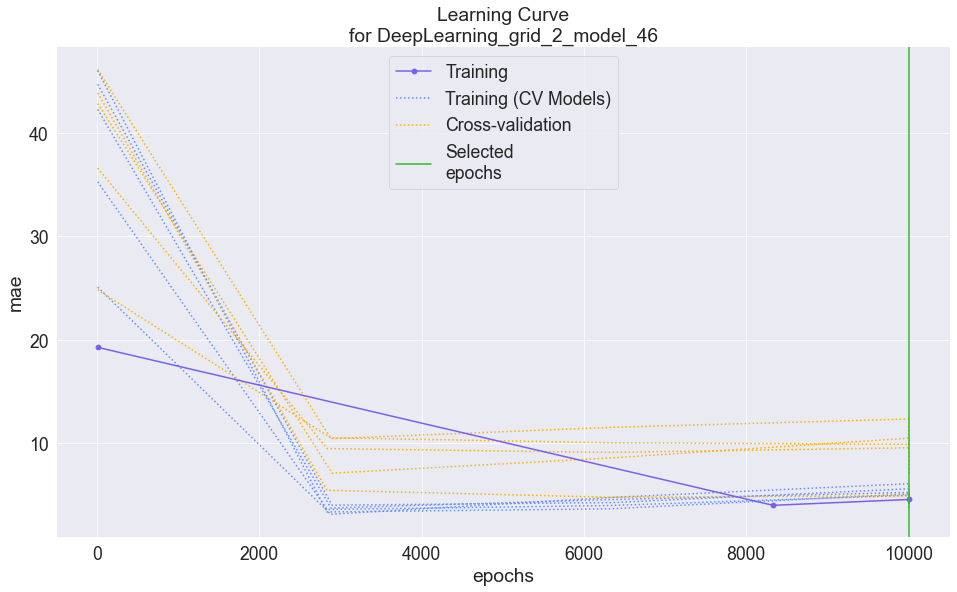

In [297]:

learning_curve = uploaded_model.learning_curve_plot(metric = 'mae')


sns.set()
sns.despine(bottom = True, left = True)
sns.set_style("whitegrid", {'axes.grid' : False})



# removes the borders around the plot
sns.despine(bottom = True, left = True)
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1})



name = 'learning_curve_merged_data'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)

None

## 5. Find predicted genotypes

In [298]:
import numpy as np

In [299]:
all_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/systematic_names_on_all_combinations.csv')
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,3
1,1,5,4
1,1,5,5
1,1,5,6
1,1,5,7
1,1,5,8
1,1,5,9
1,1,5,10


In [300]:
input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
73,5,2,6,3
75,6,2,6,5
86,5,1,6,8
106,4,2,6,3
126,7,2,6,1
...,...,...,...,...
60,5,3,5,7
114,5,4,8,6
24,2,3,7,8
27,3,3,7,10


### 5.1 Getting rid of the genotypes we have already tested:

In [301]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
3,1,1,5,4
4,1,1,5,5
6,1,1,5,7
...,...,...,...,...
1275,8,4,8,6
1276,8,4,8,7
1277,8,4,8,8
1278,8,4,8,9


In [302]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [303]:
predicted = best_model.predict(all_genotypes_df)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [304]:
len(predicted)

1121

In [305]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,1.355982
1,1.242321
2,1.388302
3,1.242321
4,1.242321


## 6. Predict the  phenotypes from the whole library

In [306]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_9976/105107836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
694,5,2,6,5,189.878434
682,5,2,5,3,186.534471
697,5,2,6,8,171.216501
852,6,2,6,3,164.485456
691,5,2,6,2,164.337251
...,...,...,...,...,...
898,6,3,6,9,-2.176208
1212,8,3,6,3,-3.291859
892,6,3,6,3,-4.446077
1122,8,1,5,3,-5.610055


If we want the names on the genotypes we can do the following: 

In [307]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

## 7. Top 20 predicted producers of the unseen library

In [308]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_strict_production']
df_with_genotypes.head(50)

,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Rse,189.878434
1,Smus,ENO2,CCW12,Ara,186.534471
2,Smus,ENO2,TPI1,Cac,171.216501
3,Rsep,ENO2,TPI1,Ara,164.485456
4,Smus,ENO2,TPI1,Aan,164.337251
5,Smus,ENO2,TPI1,Clo,154.451685
6,Smus,ENO2,TPI1,Cro,152.933305
7,Cro,ENO2,TPI1,Ara,147.209948
8,Smus,ENO2,TPI1,Oeu,147.130443
9,Smus,CYC1,TPI1,Ara,145.568738


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


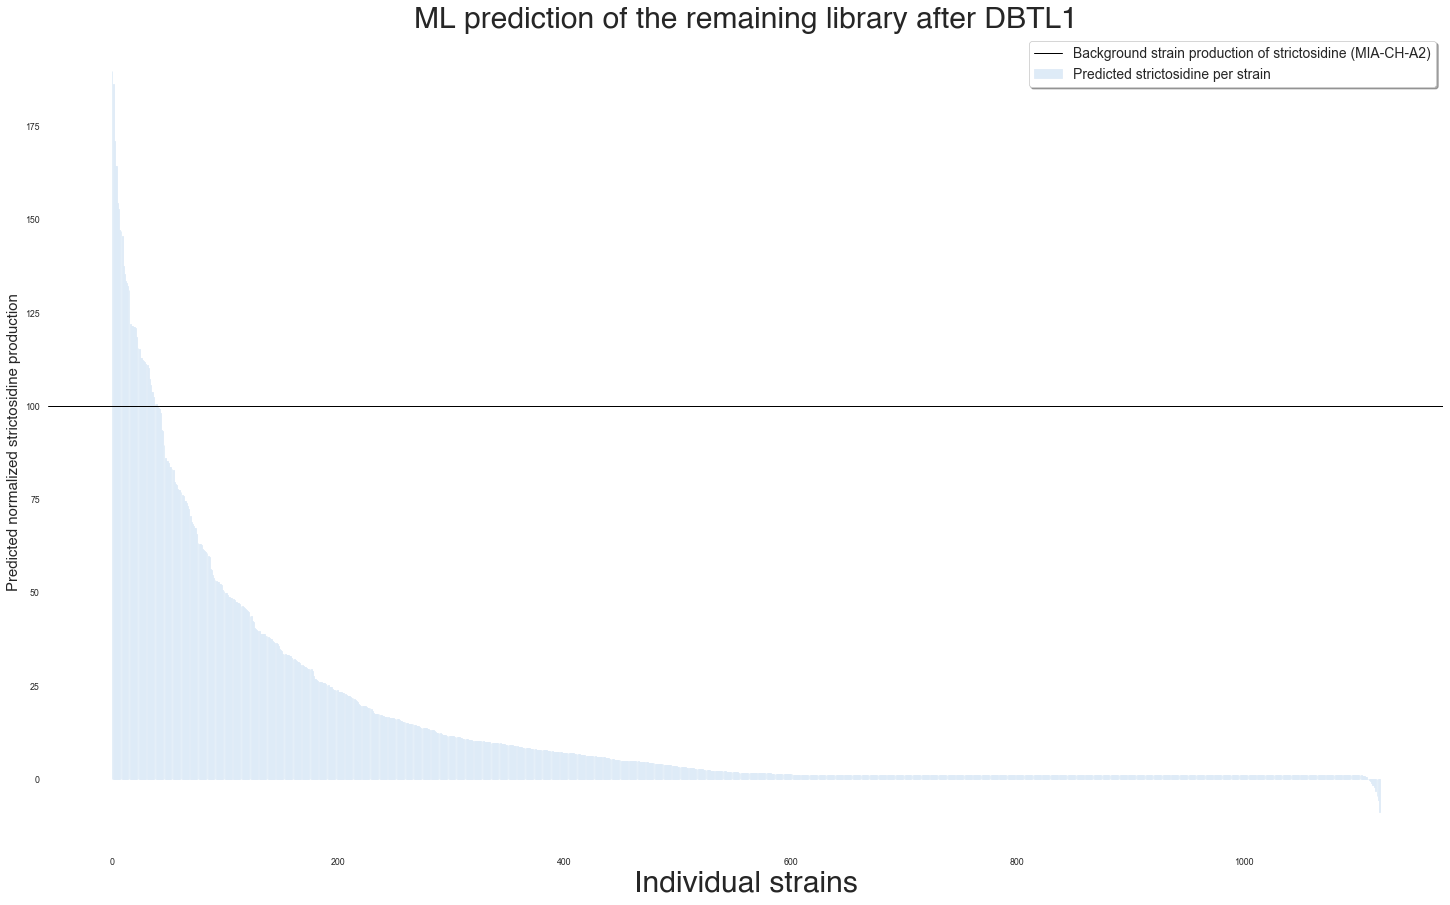

In [309]:
import matplotlib as mpl
from matplotlib.pyplot import figure

#### How can I export a matplotlib figure as a vector graphic with editable text fields?
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


import matplotlib.pyplot as plt

# Create Figure and Axes instances
fig,ax = plt.subplots(1)

# Plot
plt.bar(df_with_genotypes.index, df_with_genotypes['Predicted_strict_production'], edgecolor='#deebf7', color = '#deebf7' ) # white
  
# Errorbar
#plt.errorbar(indexes, new_df_mean_list, yerr=new_df_SE_list, fmt="o", color="black",)# ms = 2)


# Change x labels rotation
#ax.tick_params(rotation=90)

# Add labels and titel
ax.set_ylabel('Predicted normalized strictosidine production', size = 15, fontname='Helvetica')
ax.set_xlabel('Individual strains', size = 30, fontname='Helvetica')
ax.set_title('ML prediction of the remaining library after DBTL1', size = 30, fontname='Helvetica')
#plt.suptitle('Notes:\n - Triangels show individual measurements',x = 0.8,  y=0.7, fontsize=18, fontname='Helvetica')

# add horisontal line
plt.axhline(y = 100, color = 'black', linestyle = '-')

# Set color 
ax.set_facecolor("white")

# # Add legend
ax.legend(['Background strain production of strictosidine (MIA-CH-A2)', 'Predicted strictosidine per strain', 'Standard-Error (SE)', 'Individual datapoints'], loc='upper right', shadow=True, fontsize='x-large')



# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(25, 15)

name = 'Predicted normalized strictosidine production'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.pdf',format = 'pdf',  dpi = 300,bbox_inches='tight')

plt.show()

In [310]:
#df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/processed/ML_predicted/2022_2807_categorical_DeepLearning_grid_2_AutoML_1_20220919_101302_model_8')

In [326]:
df_with_genotypes

,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Rse,189.878434
1,Smus,ENO2,CCW12,Ara,186.534471
2,Smus,ENO2,TPI1,Cac,171.216501
3,Rsep,ENO2,TPI1,Ara,164.485456
4,Smus,ENO2,TPI1,Aan,164.337251
...,...,...,...,...,...
1116,Rsep,PCK1,TPI1,Oeu,-2.176208
1117,Ccal,PCK1,TPI1,Ara,-3.291859
1118,Rsep,PCK1,TPI1,Ara,-4.446077
1119,Ccal,CYC1,CCW12,Ara,-5.610055


In [327]:
df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/AutoML/top_ML_predicted_after_first_DBTL_merged_analytics.csv', index=False)

In [328]:
df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/predicted_unseen_comb_ML1_trained_on_merged_data_ranked.csv')


In [329]:
df_with_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/top_ML_predicted_after_first_DBTL_merged_analytics.csv')

In [209]:
df_with_genotypes

,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Rse,196.652401
1,Smus,ENO2,CCW12,Ara,179.541294
2,Rsep,ENO2,TPI1,Ara,176.804056
3,Smus,ENO2,TPI1,Cac,173.628029
4,Smus,CYC1,TPI1,Ara,162.287297
...,...,...,...,...,...
1116,Cacu,ENO2,CCW12,Ahu,-12.327666
1117,Opum,ENO2,TPI1,Ani,-12.803257
1118,Ccal,ENO2,TPI1,Ani,-13.418090
1119,Cacu,ENO2,TPI1,Ahu,-17.670739


In [210]:
df_with_genotypes['names'] = df_with_genotypes['G8H']+'-' +df_with_genotypes['pG8H']+ '_'+ df_with_genotypes['pCPR']+'_'+df_with_genotypes['CPR']

In [211]:
df_with_genotypes

,G8H,pG8H,pCPR,CPR,Predicted_strict_production,names
0,Smus,ENO2,TPI1,Rse,196.652401,Smus-ENO2_TPI1_Rse
1,Smus,ENO2,CCW12,Ara,179.541294,Smus-ENO2_CCW12_Ara
2,Rsep,ENO2,TPI1,Ara,176.804056,Rsep-ENO2_TPI1_Ara
3,Smus,ENO2,TPI1,Cac,173.628029,Smus-ENO2_TPI1_Cac
4,Smus,CYC1,TPI1,Ara,162.287297,Smus-CYC1_TPI1_Ara
...,...,...,...,...,...,...
1116,Cacu,ENO2,CCW12,Ahu,-12.327666,Cacu-ENO2_CCW12_Ahu
1117,Opum,ENO2,TPI1,Ani,-12.803257,Opum-ENO2_TPI1_Ani
1118,Ccal,ENO2,TPI1,Ani,-13.418090,Ccal-ENO2_TPI1_Ani
1119,Cacu,ENO2,TPI1,Ahu,-17.670739,Cacu-ENO2_TPI1_Ahu


In [212]:
x_axis = list(df_with_genotypes['names'])[:20][::-1]
y_axis = list(df_with_genotypes['Predicted_strict_production'])[:20][::-1]

In [213]:
y_axis

[114.58933646397388,
 115.94707481826975,
 116.37868385305585,
 117.11004892868188,
 119.002646982192,
 137.32593365601966,
 141.12948656660416,
 142.26963676084088,
 143.19714237016922,
 147.27211957834385,
 149.43510995475285,
 149.63149251454263,
 151.78278113108652,
 156.56118549733847,
 157.38979126116152,
 162.28729723267125,
 173.6280294403968,
 176.80405641029816,
 179.54129427377447,
 196.65240088791035]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


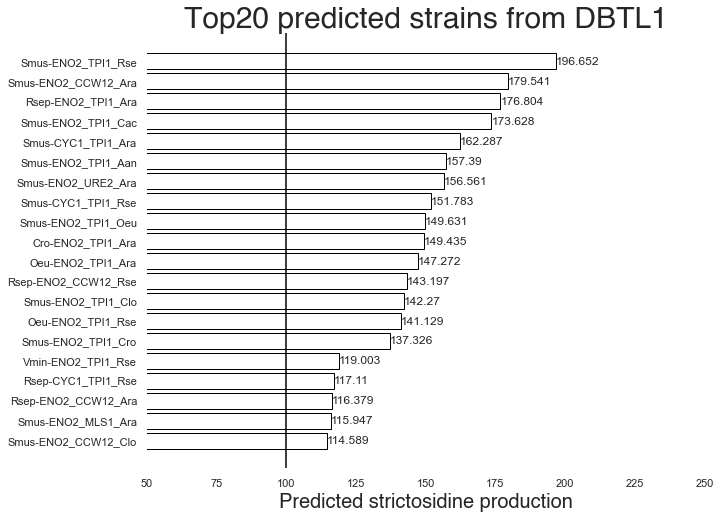

In [214]:
import matplotlib as mpl
from matplotlib.pyplot import figure

#### How can I export a matplotlib figure as a vector graphic with editable text fields?
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42



import matplotlib.pyplot as plt

# Create Figure and Axes instances
fig,ax = plt.subplots(1)

# Plot
plt.barh( x_axis[:20],y_axis[:20], edgecolor='black', color =  'white') # white # '#deebf7'

# Change x labels rotation
ax.tick_params(rotation=90)

# Add labels and titel
ax.set_xlabel('Predicted strictosidine production', size = 20, fontname='Helvetica')
#ax.set_ylabel('Individual strains', size = 20, fontname='Helvetica')
ax.set_title('Top20 predicted strains from DBTL1', size = 30, fontname='Helvetica')
#plt.suptitle('Notes:\n - Triangels show individual measurements',x = 0.8,  y=0.7, fontsize=18, fontname='Helvetica')

# remove gridlines
ax.grid(False)

# Background
ax.set_facecolor("white")


# add horisontal line
plt.axvline(x = 100, color = 'black', label = 'Normalized strict production', linestyle = '-')

# remove y labels
#plt.yticks([])
ax.tick_params(rotation=0)


# changing 
plt.xlim([50, 250])


# 
#plt.yticks(rotation='horisontal')


## adding the labels on the bar
for c in ax.containers:
#    ax.bar_label(c, labels=names_top20, label_type='center', fontname = 'Helvetica')
    ax.bar_label(c)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(10, 8)

name = 'Top20 Predicted_strains_from_ML1'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.pdf',format = 'pdf',  dpi = 300,bbox_inches='tight')
#
plt.show()

## 8. Learning curve on data

In [243]:
%%time
all_mae = []

# Run the simulation 3 times
for i in range(3):
    # partitioning
    step = int(169/5)+1
    partitions = [i for i in range(0, len(new_input_for_ml), step)]

    # INCREASING THE SIZE OF THE DATASET
    partition1 = new_input_for_ml[partitions[0]:partitions[1]]
    partition2 = new_input_for_ml[partitions[0]:partitions[2]]
    partition3 = new_input_for_ml[partitions[0]:partitions[3]]
    partition4 = new_input_for_ml[partitions[0]:partitions[4]]
    partition5 = new_input_for_ml[partitions[0]:]

    partitions_list = [partition1, partition2, partition3, partition4, partition5]

    lenght_of_the_partitions = []
    for length in partitions_list:
        lenght_of_the_partitions.append(len(length))



    ### Making the dataframes into h2o dfs
    list_of_df_test_frames = []

    for df in partitions_list: 
        # initialize a h20 dataframe 
        df_test = h2o.H2OFrame(pd.concat([df], axis='columns'))

        # Since the data is categorical we need to make it from numerical to categorical 
        df_test['0']= df_test['0'].asfactor()
        df_test['1']= df_test['1'].asfactor()
        df_test['2'] = df_test['2'].asfactor()
        df_test['3'] = df_test['3'].asfactor()

        # save the dataframes
        list_of_df_test_frames.append(df_test)


    ##### setting up ML
    # Select the columns we want to train on
    feature_cols = ['0', '1', '2', '3']

    autoML_dataclasses_list = []

    # Initialize 5 - H2O autoML class
    for i in range(len(list_of_df_test_frames)):
        AutoML = H2OAutoML(
            max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
            max_models=None,  # None =  no limit
            #nfolds=5,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
            seed=1,            # Reproducibility
            exclude_algos = ["StackedEnsemble"],
            sort_metric = "MAE",
            #keep_cross_validation_predictions=True 
        )
        autoML_dataclasses_list.append(AutoML)


    ##### Training the models on partitioned data

    for i in range(len(autoML_dataclasses_list)):
        #for j in range(len(new_list_of_list_with_5x_models[i])):
        autoML_dataclasses_list[i].train(
         x=feature_cols,
         y='Amt_norm',
         training_frame=list_of_df_test_frames[i],
             ) 



    ### getting the mae for each model 

    best_models_mae = []
    for model in autoML_dataclasses_list: 
        best_model = model.get_best_model()
        best_models_mae.append(best_model.mae())
    
    # saving ALL maes
    all_mae.append(best_models_mae)

    print(best_models_mae)
    
df = pd.DataFrame(all_mae, columns =[34, 68, 102, 136, 169], dtype = float)
df = df.T
df.to_csv('25_ml_models_running_over_partioned_qdata.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
16:44:49.303: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 34.0.

███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
17:44:58.816: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 68.0.

████████████████████████████████████████████Job request failed Unexpected HTTP error: ('Connection abort

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Total input file size of 18.5 KB is much larger than total cluster memory of Zero  , please use either a larger cluster or smaller data.
  Request: POST /3/Parse
    data: {'destination_frame': 'AutoML_102_20221205_204525_leaderboard', 'parse_type': 'CSV', 'separator': '44', 'check_header': '1', 'number_columns': '7', 'chunk_size': '4194304', 'delete_on_done': 'True', 'blocking': 'False', 'column_types': '["string","string","double","double","double","double","double"]', 'single_quotes': 'False', 'escapechar': '0', 'column_names': '["","model_id","mae","rmse","mse","rmsle","mean_residual_deviance"]', 'source_frames': '["upload_97ac008b8662e6b13ec75e54e6244f74"]'}


In [163]:
ml_learning_curve_on_partitioned_data = pd.read_csv('25_ml_models_running_over_partioned_qdata.csv')
ml_learning_curve_on_partitioned_data.columns= ['partition_length', 0, 1, 2]

ml_learning_curve_on_partitioned_data = ml_learning_curve_on_partitioned_data.set_index('partition_length')
ml_learning_curve_on_partitioned_data

,0,1,2
partition_length,,,
34,11.252663,11.252663,11.252663
68,3.264788,3.264788,3.264788
102,6.299647,6.299647,6.299647
136,5.620158,3.511481,6.229372
169,4.462371,2.970837,5.445996


In [164]:
ml_learning_curve_on_partitioned_data['mean'] = df.mean(axis=1)
ml_learning_curve_on_partitioned_data['sd'] = df.std(axis=1)

ml_learning_curve_on_partitioned_data

,0,1,2,mean,sd
partition_length,,,,,
34,11.252663,11.252663,11.252663,11.252663,0.000000
68,3.264788,3.264788,3.264788,3.264788,0.000000
102,6.299647,6.299647,6.299647,6.299647,0.000000
136,5.620158,3.511481,6.229372,5.120337,1.426218
169,4.462371,2.970837,5.445996,4.293068,1.246235


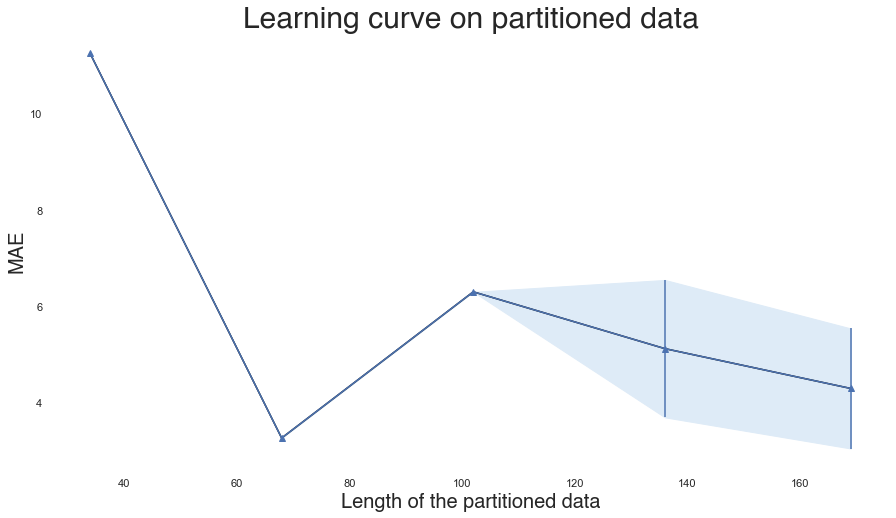

In [236]:
x = list(ml_learning_curve_on_partitioned_data.index)
y = list(ml_learning_curve_on_partitioned_data['mean'])
sd =  np.array(list(ml_learning_curve_on_partitioned_data['sd']))



# Create Figure and Axes instances
fig,ax = plt.subplots(1)

plt.plot(x, y, color =  'black')

# Errobar
plt.errorbar(x, y, sd, linestyle='-', marker='^')

# fill between
plt.fill_between(x, y-sd, y+sd, color = '#deebf7')


# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)



# Add labels and titel
ax.set_xlabel('Length of the partitioned data', size = 20, fontname='Helvetica')
ax.set_ylabel('MAE', size = 20, fontname='Helvetica')
ax.set_title('Learning curve on partitioned data', size = 30, fontname='Helvetica')


# Set color 
ax.set_facecolor("white")

# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(15, 8)

plt.show()

In [250]:
h2o.cluster.shutdown()

AttributeError: 'function' object has no attribute 'shutdown'

In [ ]:
q